# Analisis Galaxias: Aprendizaje Automático © MAHG 2020

## Paquetes de Inicio.

In [1]:
#pip install  tensorflow==1.15
#os.chdir(work_dir)
!ls

AnalisisGalaxias.ipynb                 Skyserver_SQL6_12_2020 1_34_06 PM.csv
Skyserver_SQL4_21_2020 2_08_34 PM.csv  Skyserver_SQL6_12_2020 2_02_02 PM.csv
Skyserver_SQL6_10_2020 10_02_37 PM.csv validationGALAX(V2).ipynb
Skyserver_SQL6_10_2020 10_04_43 PM.csv validationGALAX.ipynb
Skyserver_SQL6_10_2020 11_22_17 PM.csv validationGALAXJup.ipynb
Skyserver_SQL6_10_2020 8_42_32 PM.csv  validationGALAXV.ipynb


In [2]:
from __future__ import print_function

import math
import tensorflow

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
#tensorflow_version 1.x
import tensorflow as tf
print("Version de Tensorflow") 
print (tensorflow.__version__)
from tensorflow.python.data import Dataset

from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

#tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format#### Lectura de Archivo.#### Lectura de Archivo.#### Lectura de Archivo.

Version de Tensorflow
1.15.0


## Lectura de Archivo

In [3]:
skyserver = pd.read_csv("Skyserver_SQL4_21_2020 2_08_34 PM.csv", sep=",", header =1)
skyserver.head()
skyserver['class'] = skyserver['class'].replace({'GALAXY':0, 'QSO':1})

#### Reorganizacion aleatoria de los datos

In [4]:
skyserver = skyserver.reindex(
    np.random.permutation(skyserver.index))
skyserver["z"] /= 1.0
skyserver

,ObjID,class,ra,dec,z,h_beta_flux,oiii_5007_flux,h_alpha_flux,nii_6584_flux
217681,1237660669282353323,0,158.1,10.5,0.1,4.4,0.8,15.4,2.9
109698,1237654653641490609,0,133.6,48.2,0.1,-75.1,4.2,2.4,2.3
301920,1237661069789233326,0,159.5,13.7,0.1,48.7,13.1,259.3,87.2
172647,1237655370904371342,0,212.0,60.6,0.2,0.5,5.3,13.0,12.3
7508,1237651190287040622,0,139.9,55.7,0.0,57.7,14.9,290.9,96.1
...,...,...,...,...,...,...,...,...,...
412308,1237662337869283657,0,247.9,27.7,0.1,20.4,1.7,80.9,33.7
359900,1237661384387985542,0,158.6,40.4,0.1,19.7,8.2,64.9,24.1
272806,1237658919071842406,0,205.2,54.6,0.1,19.4,28.0,98.0,54.5
144842,1237657856068944011,0,165.4,50.4,0.1,38.0,4.3,165.0,59.2


## Analisis estadístico de la muestra

In [5]:
skyserver.describe()

,ObjID,class,ra,dec,z,h_beta_flux,oiii_5007_flux,h_alpha_flux,nii_6584_flux
count,500000.0,500000.0,500000.0,500000.0,500000.0,500000.0,500000.0,500000.0,500000.0
mean,1237658689673618688.0,0.0,184.8,25.3,0.1,1582999.4,3366255.1,44693246472.0,1080773.3
std,4506804555380.8,0.0,69.9,21.4,0.1,109438503.8,408961288.4,31593191834882.9,61615048.5
min,1237645879551066368.0,0.0,0.0,-11.3,-0.0,-670374200.0,-320867400.0,-153402600000.0,-1067148000.0
25%,1237655128761745664.0,0.0,147.7,5.1,0.1,4.4,4.7,13.5,9.2
50%,1237659325490463232.0,0.0,186.7,27.0,0.1,13.5,10.2,51.0,26.2
75%,1237662238565794304.0,0.0,226.3,43.6,0.1,36.9,22.0,154.2,61.3
max,1237667255079862272.0,1.0,360.0,70.3,0.4,38871370000.0,200374900000.0,22339760000000000.0,11168550000.0


In [6]:
skyserver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 217681 to 494679
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ObjID           500000 non-null  int64  
 1   class           500000 non-null  int64  
 2   ra              500000 non-null  float64
 3   dec             500000 non-null  float64
 4   z               500000 non-null  float64
 5   h_beta_flux     500000 non-null  float64
 6   oiii_5007_flux  500000 non-null  float64
 7   h_alpha_flux    500000 non-null  float64
 8   nii_6584_flux   500000 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 38.1 MB


In [7]:
skyserver.columns
print(skyserver['class'].unique())
skyserver['class'].value_counts(normalize = False)

[0 1]


0    499553
1       447
Name: class, dtype: int64

#### Creacion de las razones de Flujo

In [8]:
import numpy as np
skyserver['oiiihb']=np.log10(skyserver['oiii_5007_flux']/skyserver['h_beta_flux'])
skyserver['niiha']=np.log10(skyserver['nii_6584_flux']/skyserver['h_alpha_flux'])

/Users/marioahiguerag/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
skyserver = skyserver.dropna(subset = ['oiiihb', 'niiha'], how = 'any')

## Grafico de la Muestra de galaxias y curva de Kewley

(-3.6, 3.6)

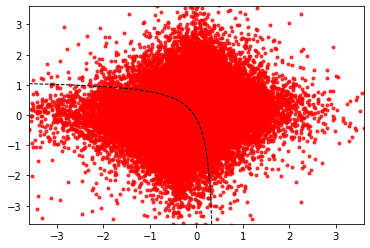

In [10]:
import seaborn as sns

aux0 = skyserver[skyserver['class']==0]
aux1 = skyserver[skyserver['class']==1]
plt.scatter(x = aux0['niiha'], y = aux0['oiiihb'], color='red', marker = '.', alpha = 0.75)
plt.scatter(x = aux1['niiha'], y = aux1['oiiihb'], color='red', marker = '.', alpha = 0.75)

# Kewley

x1 = np.linspace(-3.6,0.469)
y1 = 1.19 + (0.61/(x1-0.47))

plt.plot(x1, y1, '--' , color='black',lw=1, label='Kewley' ) 

plt.xlim(-3.6,3.6)
plt.ylim(-3.6,3.6)

## Separación de la Muestra de galaxias y curvas de Kewley, Kauffman y Cid-Fernandes

Text(0, 0.5, 'Log([OIII]5007]/Hbeta)')

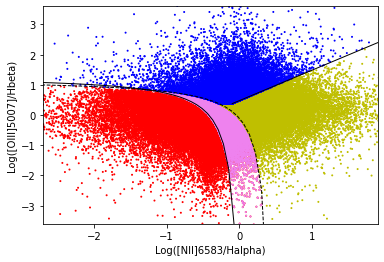

In [11]:
import seaborn as sns

aux0 = skyserver[skyserver['class']==0]
aux1 = skyserver[skyserver['class']==1]
#plt.scatter(x = aux0['niiha'], y = aux0['oiiihb'], color='red', marker = '.', alpha = 1)
#plt.scatter(x = aux1['niiha'], y = aux1['oiiihb'], color='blue', marker = '+')
ejey = skyserver['oiiihb']
ejex = skyserver['niiha']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)


# Kewley

x1 = np.linspace(-3.6,0.469)
y1 = 1.19 + (0.61/(x1-0.47))

#Kauffman

x2 = np.linspace(-3.6,0.0) 
y2 = 1.3 + (0.61/(x2-0.05))

#Cid-Fernandes

x3 = np.linspace(-0.1,4.0) 
y3 = 0.48 +1.01*x3


ax.plot(x1, y1, '--' , color='black',lw=1, label='Kewley' ) 
ax.plot(x2, y2, '-' , color='black', lw=1, label='Kauffman' ) 
ax.plot(x3, y3, '-' , color='black', lw=1, label='Cid. Fernandes' ) 
ax.set_ylim(-3.6,3.6) 
ax.set_xlim(-2.7,1.9) 


c1 = ejey < np.interp(ejex, x1, y1) 
c2 = (ejey < np.interp(ejex, x1, y1)) & (ejey > np.interp(ejex, x2, y2)) 
c3 = (ejey < np.interp(ejex, x3, y3)) & (ejey > np.interp(ejex, x1, y1)) 
c4 = (ejey > np.interp(ejex, x1, y1)) & (ejey > np.interp(ejex, x3, y3))

ax.scatter(ejex, ejey, c1, facecolors="none",edgecolors="red") 
ax.scatter(ejex, ejey, c2, facecolors="none",edgecolors="violet") 
ax.scatter(ejex, ejey, c3, facecolors="none",edgecolors="y") 
ax.scatter(ejex, ejey, c4, facecolors="none",edgecolors="blue") 

ax.set_xlabel(r'Log([NII]6583/Halpha)') 
ax.set_ylabel(r'Log([OIII]5007]/Hbeta)')

### Datos de trabajo: [NII/Halpha] y [OIII/Hbeta]

### Analisis de regresión lineal

In [12]:
# Se define la variable a trabajar:
my_feature = skyserver[["h_beta_flux"]]
##my_feature2= skyserver[["niiha"]]

# Configure a numeric feature column razon oiii/hb.
feature_columns = [tf.feature_column.numeric_column("h_beta_flux")]

In [13]:
# Se define la variable Objetivo
targets = skyserver['oiiihb']
##target2 = skyserver['niiha']

In [14]:
# Use gradient descent as the optimizer for training the model.
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bd/f5q27jzs5bz1yq4v_51d4dgh0000gn/T/tmptzdmc_os', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_work

In [13]:
"""""from tensorflow.keras import optimizers
my_optimizer = optimizers.SGD(lr=0.0000001, clipnorm=5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bd/f5q27jzs5bz1yq4v_51d4dgh0000gn/T/tmpz0x3w2cq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [15]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [16]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bd/f

### Se evalua el modelo

In [17]:
# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bd/f5q27jzs5bz1yq4v_51d4dgh0000gn/T/tmptzdmc_os/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Mean Squared Error (on training data): 2443188.064
Root Mean Squared Error (on training data): 1563.070


In [18]:
min_oiiihb = skyserver["oiiihb"].min()
max_oiiihb = skyserver["oiiihb"].max()
min_max_difference = max_oiiihb - min_oiiihb

print("Min. oiiihb: %0.3f" % min_oiiihb)
print("Max. oiiihb: %0.3f" % max_oiiihb)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. oiiihb: -5.780
Max. oiiihb: 6.540
Difference between Min. and Max.: 12.320
Root Mean Squared Error: 1563.070


In [19]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,424529.0,360296.0
mean,-24.3,-0.1
std,1562.7,0.5
min,-512099.6,-5.4
25%,-0.0,-0.4
50%,-0.0,-0.1
75%,-0.0,0.2
max,1612.7,6.5


In [25]:
sample = skyserver.sample(n=5000)

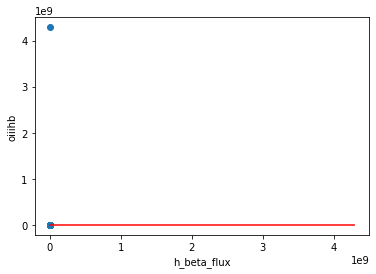

In [24]:
# Get the min and max total_rooms values.
x_0 = sample["h_beta_flux"].min()
x_1 = sample["h_beta_flux"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/h_beta_flux/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("oiiihb")
plt.xlabel("h_beta_flux")

# Plot a scatter plot from our data sample.
plt.scatter(sample["oiiihb"], sample["h_beta_flux"])

# Display graph.
plt.show()

In [22]:
from tensorflow.keras import optimizers
def train_model(learning_rate, steps, batch_size, input_feature="h_beta_flux"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = skyserver[[my_feature]]
  my_label = "oiiihb"
  targets = skyserver[my_label]

  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions.
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = skyserver.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bd/f5q27jzs5bz1yq4v_51d4dgh0000gn/T/tmp7rvc2an8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7faedfcb1390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training mod

,predictions,targets
count,424529.0,360296.0
mean,-1911.0,-0.1
std,122962.4,0.5
min,-40294968.0,-5.4
25%,-0.0,-0.4
50%,-0.0,-0.1
75%,-0.0,0.2
max,126900.3,6.5


Final RMSE (on training data): 122991.22


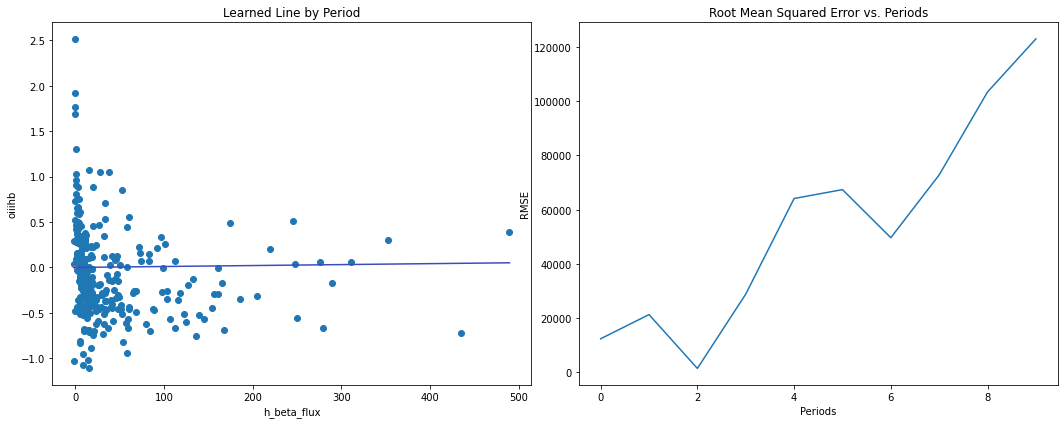

In [23]:
train_model(
    learning_rate=0.00001,
    steps=100,
    batch_size=1
)